Hand written function time passed in seconds: 6.465604066848755
Built-in filter2D time passed in seconds:     0.0011410713195800781


0

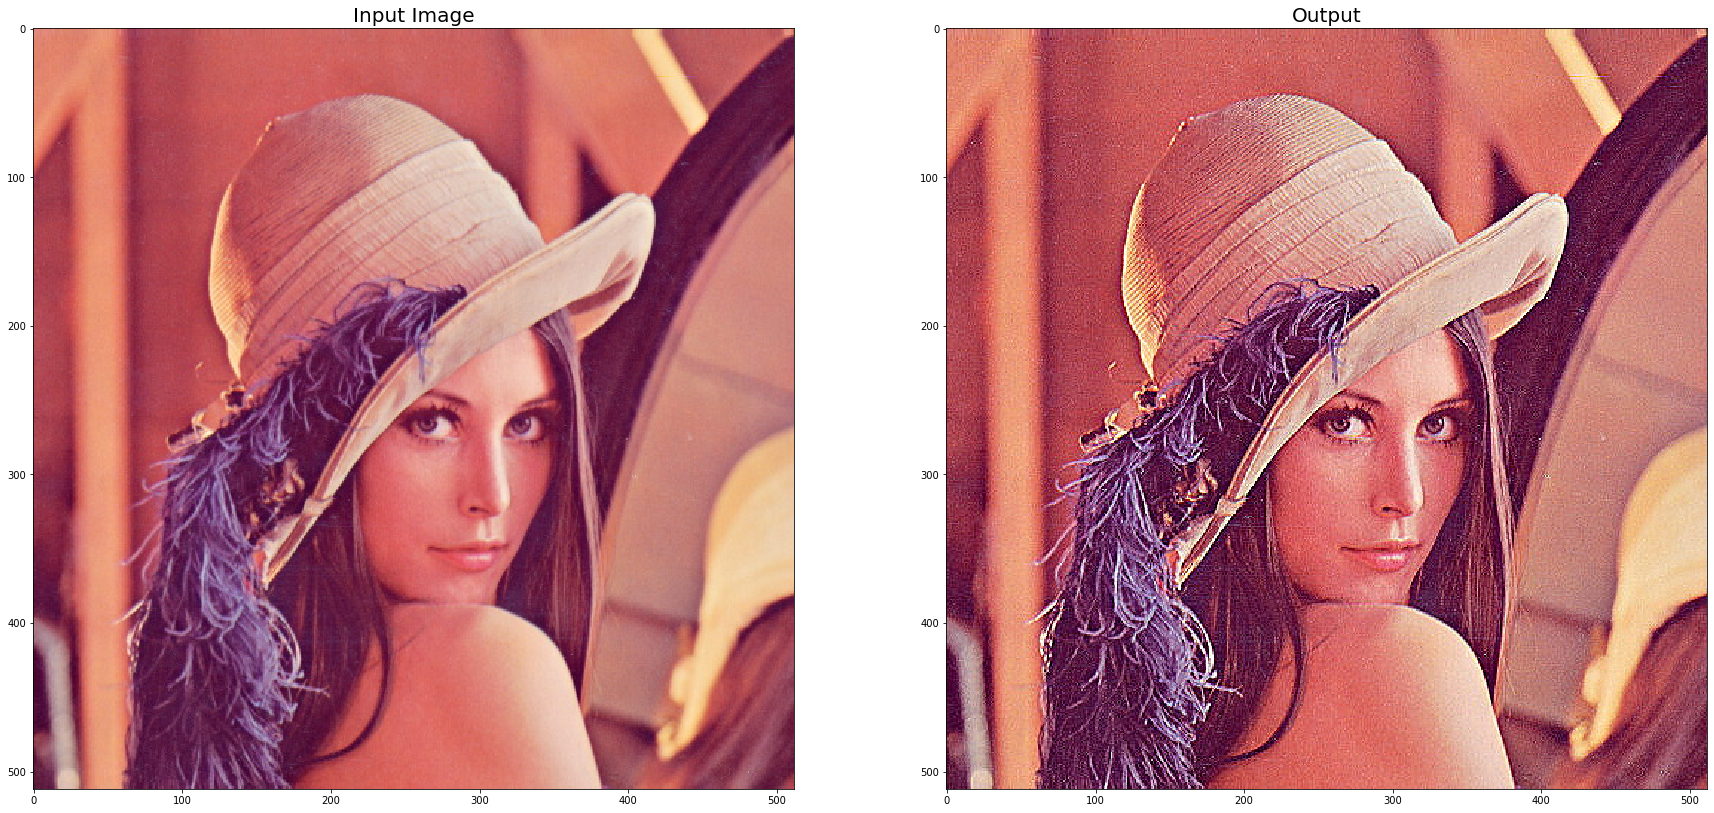

In [5]:
from __future__ import print_function
import sys
import time
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

## [basic_method]
def is_grayscale(my_image):
    return len(my_image.shape) < 3


def saturated(sum_value):
    if sum_value > 255:
        sum_value = 255
    if sum_value < 0:
        sum_value = 0

    return sum_value


def sharpen(my_image):
    if is_grayscale(my_image):
        height, width = my_image.shape
    else:
        my_image = cv.cvtColor(my_image, cv.CV_8U)
        height, width, n_channels = my_image.shape

    result = np.zeros(my_image.shape, my_image.dtype)
    ## [basic_method_loop]
    for j in range(1, height - 1):
        for i in range(1, width - 1):
            if is_grayscale(my_image):
                sum_value = 5 * my_image[j, i] - my_image[j + 1, i] - my_image[j - 1, i] \
                            - my_image[j, i + 1] - my_image[j, i - 1]
                result[j, i] = saturated(sum_value)
            else:
                for k in range(0, n_channels):
                    sum_value = 5 * my_image[j, i, k] - my_image[j + 1, i, k]  \
                                - my_image[j - 1, i, k] - my_image[j, i + 1, k]\
                                - my_image[j, i - 1, k]
                    result[j, i, k] = saturated(sum_value)
    ## [basic_method_loop]
    return result
## [basic_method]

def main():
    filename = '../data/lena.jpg'

    img_codec = cv.IMREAD_COLOR
    #img_codec = cv.IMREAD_GRAYSCALE

    src = cv.imread(filename, img_codec)

    if src is None:
        print("Can't open image [" + filename + "]")
        print("Usage:")
        print("mat_mask_operations.py [image_path -- default lena.jpg] [G -- grayscale]")
        return -1

    t = round(time.time())

    dst0 = sharpen(src)

    t = (time.time() - t)
    print("Hand written function time passed in seconds: %s" % t)


    t = time.time()
    ## [kern]
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]], np.float32)  # kernel should be floating point type
    ## [kern]
    ## [filter2D]
    dst1 = cv.filter2D(src, -1, kernel)
    # ddepth = -1, means destination image has depth same as input image
    ## [filter2D]

    t = (time.time() - t)
    print("Built-in filter2D time passed in seconds:     %s" % t)

    fig = plt.figure(figsize=(30, 24))
    ax = fig.subplots(1, 2)
    ax[0].imshow(cv.cvtColor(src, cv.COLOR_BGR2RGB))
    ax[0].set_title('Input Image', fontsize=20)
    ax[1].imshow(cv.cvtColor(dst1, cv.COLOR_BGR2RGB))
    ax[1].set_title('Output', fontsize=20)
    return 0


main()